18/18 [==============================] - 6s 343ms/step


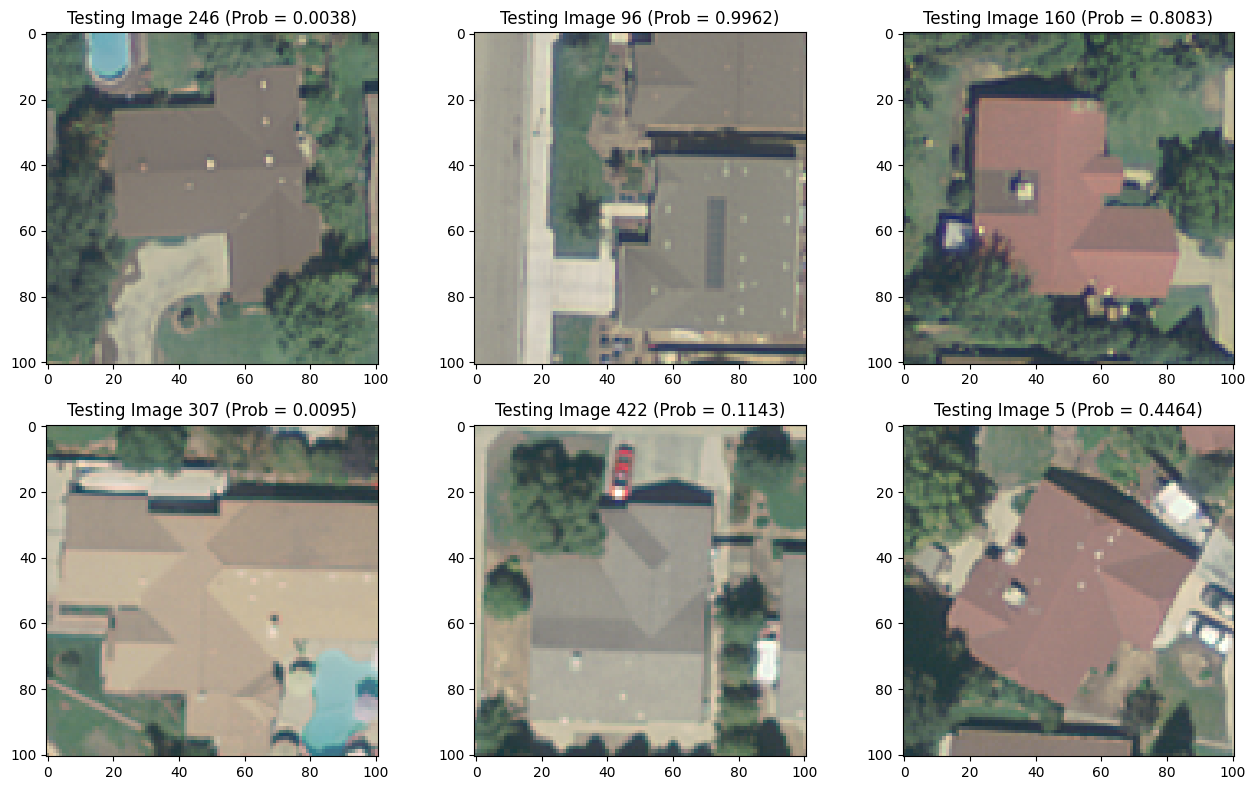

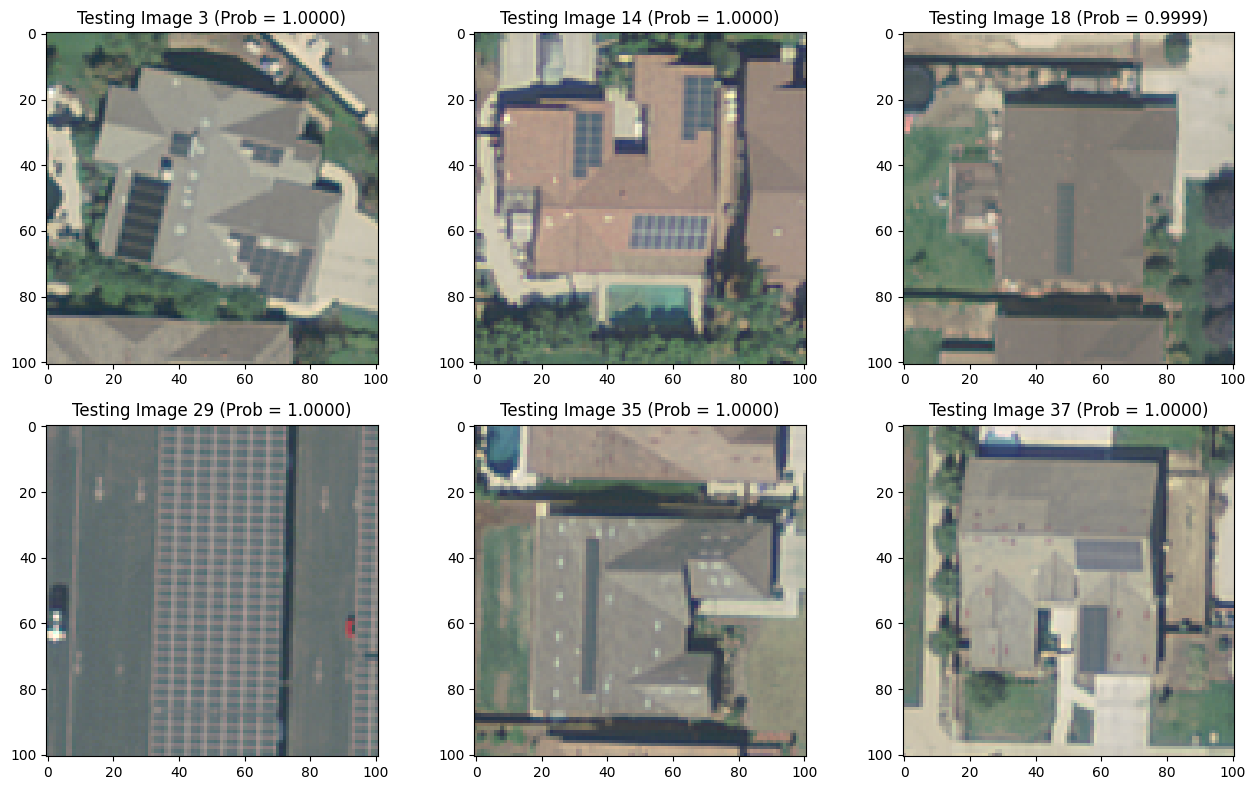

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

# Load the saved model
loaded_model = load_model("solar_panel_model.h5")

# Function to load testing data
def load_test_data(dir_test):
    """
    dir_test - the testing data or image directory
    returns - it returns all the testing images in array format
    """
    data = []

    for identifier in os.listdir(dir_test):
        fname = os.path.join(dir_test, identifier)
        image = plt.imread(fname)
        data.append(image)

    return np.array(data)

# Load testing data
DIR_TEST_IMAGES = "./testing/"
X_test = load_test_data(DIR_TEST_IMAGES)

# Scale pixel values between 0 and 1
X_test = X_test / 255.0

# Make predictions on the testing data
y_test_pred_prob = loaded_model.predict(X_test).reshape((-1,))
y_test_pred_class = [1 if pred >= 0.99 else 0 for pred in y_test_pred_prob]  # Adjust threshold as needed

# Display the first 6 random testing images and show the ones where predicted probability is very close to 1
plt.figure(figsize=(13, 8))
count = 0
for i in np.random.choice(len(y_test_pred_prob), 6, replace=False):
    count += 1
    plt.subplot(2, 3, count)
    plt.imshow(X_test[i])
    plt.title('Testing Image {} (Prob = {:.4f})'.format(i + 1, y_test_pred_prob[i]))
plt.tight_layout()
plt.show()

# Display the images where predicted probability is very close to 1
plt.figure(figsize=(13, 8))
count = 0
for i in range(len(y_test_pred_prob)):
    if np.isclose(y_test_pred_prob[i], 1.0, atol=1e-4) and count < 6:
        count += 1
        plt.subplot(2, 3, count)
        plt.imshow(X_test[i])
        plt.title('Testing Image {} (Prob = {:.4f})'.format(i + 1, y_test_pred_prob[i]))
plt.tight_layout()
plt.show()
